# **Importiong Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Exploratory Data Analysis**

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# getting some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
 # Checking missing values
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
# calculating or statistical measure of data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# checking the columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# How many missing zeros are mising in each feature
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(data.loc[data[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [12]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
data[feature_columns] = fill_values.fit_transform(data[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(data.loc[data[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


# Splitting The data

In [13]:
from sklearn.model_selection import train_test_split


X = data[feature_columns]
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# **Bagging Algorithms**
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

* Bagged Decision Trees
* Random Forest
* Extra Trees
# Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example is decision trees, often constructed without pruning.
# Bagging Classifier:

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting. If samples are drawn with replacement, then the method is known as Bagging. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.

**BaggingClassifier Parameters:**

* base_estimator: The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.
n_estimators: The number of base estimators in the ensemble.
* max_samples: The number of samples to draw from X to train each base estimator.
* max_features: The number of features to draw from X to train each base estimator.
* bootstrap: Whether samples are drawn with replacement. If False, sampling without replacement is performed.
* bootstrap_features: Whether features are drawn with replacement.
* oob_score: Whether to use out-of-bag samples to estimate the generalization error.
* warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [17]:
!pip install scikit-learn --upgrade

In [18]:
# Building models
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=1500, random_state=42)

bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832168   0.636364  0.757576    0.734266      0.764357
recall       0.788079   0.700000  0.757576    0.744040      0.757576
f1-score     0.809524   0.666667  0.757576    0.738095      0.760049
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [19]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

# **Random Forest**
A random forest is a meta-estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

# Random forest algorithm parameters:
* n_estimators: The number of trees in the forest.
* criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split: The minimum number of samples required to split an internal node.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* min_weight_fraction_leaf: The minimum weighted fraction of the total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_features: The number of features to consider when looking for the best split.
* max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then an unlimited number of leaf nodes.
* min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise, it is a leaf.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.
* warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [23]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

# **Extra Trees**
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

# ExtraTreeClassifier:

This class implements a meta-estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**ExtraTreeClassifier Parameters:**

* n_estimators: The number of trees in the forest.
* criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split: The minimum number of samples required to split an internal node.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_features: The number of features to consider when looking for the best split.
* max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then an unlimited number of leaf nodes.
* min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise, it is a leaf.
* bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.
* warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[124  27]
 [ 25  55]]
ACCURACY SCORE:
0.7749
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832215   0.670732  0.774892    0.751473      0.776290
recall       0.821192   0.687500  0.774892    0.754346      0.774892
f1-score     0.826667   0.679012  0.774892    0.752840      0.775531
support    151.000000  80.000000  0.774892  231.000000    231.000000


In [25]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

# **Boosting Algorithms**
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions that may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

* AdaBoost
* Stochastic Gradient Boosting

# AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

**AdaBoostClassifier:**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

# AdaBoostClassifier Params:

* base_estimator: The base estimator from which the boosted ensemble is built.
* n_estimators: The maximum number of estimators at which boosting is terminated. In case of the perfect fit, the learning procedure is stopped early.
* learning_rate: The learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.
* algorithm: If 'SAMME.R' then use the SAMME.R real boosting algorithm. base_estimator must support the calculation of class probabilities. If 'SAMME' then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


In [27]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

# **Stochastic Gradient Boosting**
Stochastic Gradient Boosting (also called Gradient Boosting Machines) is one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the best techniques available for improving performance via ensembles.

# GradientBoostingClassifier:

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

**GradientBoostingClassifier Parameters:**

* loss: loss function to be optimized. 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss 'exponential' gradient boosting recovers the AdaBoost algorithm.
* learning_rate: learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
* n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
* subsample: The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
* criterion: The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with an improvement score by Friedman, "mse" for the mean squared error, and "mae" for the mean absolute error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.
* min_samples_split: The minimum number of samples required to split an internal node.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
* max_depth: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
* min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
* min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise, it is a leaf.
* max_features: The number of features to consider when looking for the best split.
* max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then an unlimited number of leaf nodes.
* warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution.
* validation_fraction: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if n_iter_no_change is set to an integer.
* n_iter_no_change: used to decide if early stopping will be used to terminate training when the validation score is not improving. By default, it is set to None to disable early stopping. If set to a number, it will set aside the validation_fraction size of the training data as validation and terminate training when the validation score is not improving in all of the previous n_iter_no_change numbers of iterations. The split is stratified.
tol: Tolerance for the early stopping. When the loss is not improving by at least tol for n_iter_no_change iterations (if set to a number), the training stops.
ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [29]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# **Voting Ensemble**
Voting is one of the simplest ways of combining predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in Scikit-learn.

**VotingClassifier :**

* estimators: Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.
* voting: If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predict the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 38  42]]
ACCURACY SCORE:
0.7446
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.773810   0.666667  0.744589    0.720238      0.736704
recall       0.860927   0.525000  0.744589    0.692964      0.744589
f1-score     0.815047   0.587413  0.744589    0.701230      0.736213
support    151.000000  80.000000  0.744589  231.000000    231.000000


In [31]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

# **Model Comparison**

<Axes: >

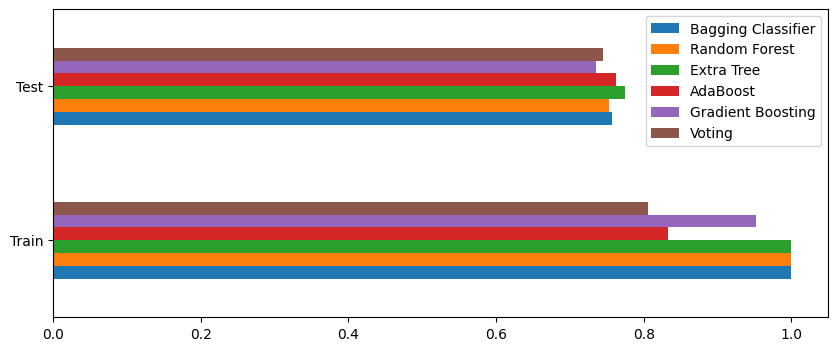

In [34]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(10, 4))

# ***Summary***
In this notebook, we discovered ensemble machine learning algorithms for improving the performance of models on your problems.

You learned about:

* Bagging Ensembles including Bagged Decision Trees, Random Forest, and Extra Trees.
* Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.
* Voting Ensembles for averaging the predictions for any arbitrary models.